In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#맑은 고딕 적용
matplotlib.rc('font', family = 'Malgun Gothic')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#분류 NN
from sklearn.neural_network import MLPClassifier

# 분류 knn
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# 인공 신경망(유방암)

In [64]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/유방암.CSV",encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [65]:
df_raw.isnull().sum(axis = 0)

#결측치 없음

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [66]:
# 변수 역할 지정

df_raw_y = df_raw["diagnosis"] 
df_raw_y = np.where(df_raw_y == "음성", 0, 1)  # 음성이면 0 양성이면 1
df_raw_x = df_raw.drop(["diagnosis"], axis = 1, inplace = False)

In [6]:
df_raw_y

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [7]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [8]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [9]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.599
Accuracy on test set : 0.758


train 59.9%  test 75.8%로 두 데이터에 대해서 과속적합이 있을 것으로 예상됩니다.

In [10]:
train_accuracy= []
test_accuracy = []
# hidden_layer 은닉층 변경  / 은닉층 1개인 경우
para_hidden = [20 * hidden for hidden in range(1,9)] 

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.906,0.914
1,40,0.911,0.922
2,60,0.599,0.758
3,80,0.594,0.758
4,100,0.599,0.758
5,120,0.849,0.875
6,140,0.938,0.891
7,160,0.922,0.930


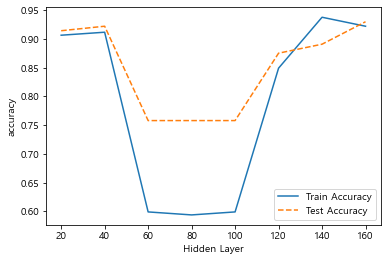

In [11]:
# 모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

In [12]:
train_accuracy= []
test_accuracy = []
# hidden_layer 은닉층 변경  / 은닉층 2개인 경우
para_hidden = [20 * hidden for hidden in range(1,9)] 

for v_hidden in para_hidden:
    
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.901,0.875
1,40,0.599,0.758
2,60,0.943,0.875
3,80,0.599,0.758
4,100,0.875,0.859
5,120,0.865,0.828
6,140,0.833,0.734
7,160,0.880,0.914


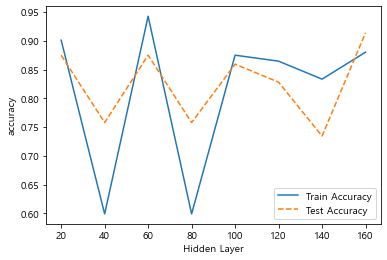

In [13]:
# 모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

은닉층 구조가 복잡할수록 모델의 정확도는 증가한다.  다만 여기서는 은닉층이 1개 인경우가 더 정확도가 높다고 판단된다

In [14]:
train_accuracy= []
test_accuracy = []
# activaiton 변경 
# 입력층 또는 이전의 은닉층의 정보를 다음 층으로의 출력하는 활성화 방식을 지정한다. 
para_function = ['logistic', 'tanh','relu'] 

for v_function in para_function:
    nn = MLPClassifier(activation= v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.898
1,tanh,0.943,0.906
2,relu,0.599,0.758


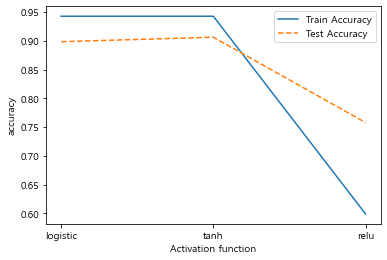

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Activation function')
plt.legend()

tanh의 모델의 정확도가 가장 높아보이고, relu 함수를 적용 시 , 다른 함수들보다 정확도가 상대적으로 더 낮다. scale 변환 후 다시 비교해봐야 할 것으로 판단된다.

In [17]:
#변수 이름 저장
v_feature_name = df_train_x.columns

#설명 변수의 scale 변환
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns= v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [20]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [21]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set : 0.995
Accuracy on test set : 0.953


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


scale 변환 후 정확도가 올라갔음을 알 수있다.

In [29]:
train_accuracy= []
test_accuracy = []
# hidden layer size 변경
# 은닉층을 변경.
para_hidden = [20 * hidden for hidden in range(1,11)] 

for v_hidden in para_hidden:
    # 은닉층 1개로 설정함
    nn = MLPClassifier(hidden_layer_sizes = v_hidden ,random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.599,0.758
1,40,0.745,0.547
2,60,0.891,0.828
3,80,0.750,0.664
4,100,0.828,0.719
5,120,0.344,0.383
6,140,0.781,0.742
7,160,0.792,0.656
8,180,0.776,0.664
9,200,0.156,0.266


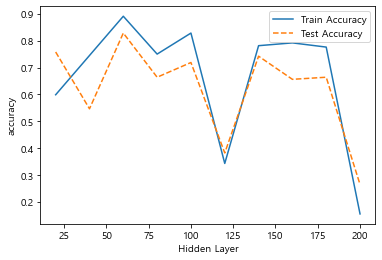

In [30]:
# 모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

은닉층이 증가할수록 정확도가 오르다가 너무 많아지면 은닉층이 복잡하여 정확도가 떨어지는 것으로 판단된다.

은닉층은 60으로 결정한다.

In [31]:
train_accuracy= []
test_accuracy = []
# activaiton 은닉층 변경 
para_function = ['logistic', 'tanh','relu'] 

for v_function in para_function:
    nn = MLPClassifier(activation= v_function, hidden_layer_sizes=60, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.930
1,tanh,0.990,0.922
2,relu,0.995,0.945


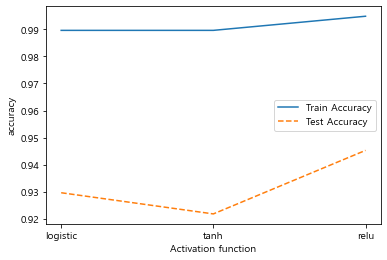

In [32]:
# 모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Activation function')
plt.legend()

relu 함수의 모델이 가장 높은 정확도를 보인다. 데이터 scaling의 영향을 많이 받는다는 의미를 알 수 있다

In [33]:
train_accuracy= []
test_accuracy = []
# solver 변경 - 가중치 최적화를 변경함
para_solver = ['lbfgs', 'sgd','adam'] 

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation= 'relu', hidden_layer_sizes=60, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["solver"] = para_solver
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.938
1,sgd,0.979,0.883
2,adam,0.995,0.945


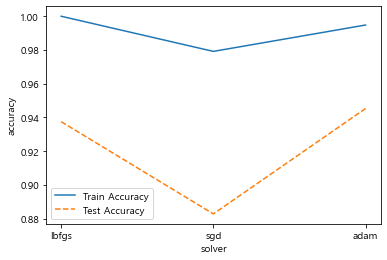

In [34]:
# 모델 설명력 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('solver')
plt.legend()

adam 모델이 가장 높은 정확도를 보인다. 

In [35]:
train_accuracy= []
test_accuracy = []
# mini batch 변경 - 전체 학습 데이터를 배치 크기로 등분하여 각 배치 데이터를 순차적으로 실행하는 방법
para_batch = [20 * batch for batch in range(1,10)] 

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', 
                       activation= 'relu', hidden_layer_sizes=60, random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

,Mini batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.938
1,40,1.000,0.938
2,60,1.000,0.945
3,80,0.995,0.945
4,100,0.995,0.945
5,120,0.995,0.945
6,140,0.995,0.945
7,160,0.995,0.945
8,180,0.995,0.945


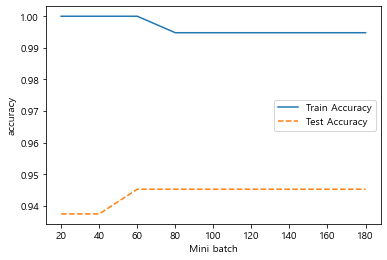

In [36]:
# 모델 설명력 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('Mini batch')
plt.legend()

배치가 커질수록 train 은 과적합이 되고 test는 오차 증가 경향성이 있다. 그러므로 배치는 80으로 설정하기로 한다.

In [37]:
nn_final =MLPClassifier(batch_size = 80, solver = 'adam', 
                       activation= 'relu', hidden_layer_sizes=60, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.995
Accuracy on test set : 0.945
Confusion matrix : 
[[90  7]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.928     0.963        97
           1      0.816     1.000     0.899        31

    accuracy                          0.945       128
   macro avg      0.908     0.964     0.931       128
weighted avg      0.955     0.945     0.947       128



C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


test 데이터 기준으로 정분류율은 94.5%이다. 정밀도는 94.6% 민감도는100%  조화 평균 89.9%으로 나온다.

좋은 모델이라고 판단된다.

이전에 실습했던 의사결정나무, 랜덤포레스트, 서포트 벡터머신보다 정확성이 높아 좋은 모델이라고 판단된다.

유방암이라고 예측했을때 실제 유방암의 결과를 맞춘건 31건이며 유방암이 아니라고 예측했을때 유방암인 경과는 0개이다

# knn 분류(유방암)

In [38]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/유방암.CSV",encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [39]:
# 변수 역할 지정

df_raw_y = df_raw["diagnosis"] 
df_raw_y = np.where(df_raw_y == "음성", 0, 1)  # 음성이면 0 양성이면 1
df_raw_x = df_raw.drop(["diagnosis"], axis = 1, inplace = False)

# 위에서 결측치는 없음을 확인했다.

In [40]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [41]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.932
Accuracy on test set : 0.914


train과 test의 성능이 유사해 보이지만 다소 과소적합으로 판단된다...

In [42]:
train_accuracy= []
test_accuracy = []
# 최대 이웃 수 : 3~30
para_n_neighbors = [i for i in range(3,31)] 

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


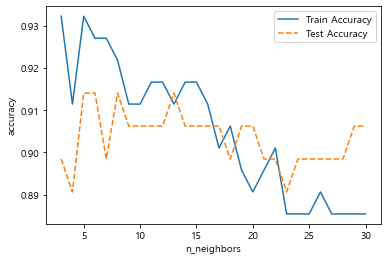

In [43]:
# 모델 설명력 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#4로 결정

이웃수가 3~13 까지 정확도가 증가하는 것으로 보인다. 하지만 그이후로는 정확도가 떨어지는것을 알 수 있다.

이웃수는 13으로설정해주는 것이 좋을 것이라고 판단된다>
.

In [50]:
train_accuracy= []
test_accuracy = []
para_neighbors = [i for i in range(3,31)] *2
# 이웃수는 3~ 30으로 설정
# 가중치별 이웃 수 증가에 따른 정확도 변화보기
para_weights = (["uniform"])*28 + (["distance"])*28

for (v_n_neighbors, v_weights) in zip(para_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.932,0.898
1,4,uniform,0.911,0.891
2,5,uniform,0.932,0.914
3,6,uniform,0.927,0.914
4,7,uniform,0.927,0.898
5,8,uniform,0.922,0.914
6,9,uniform,0.911,0.906
7,10,uniform,0.911,0.906
8,11,uniform,0.917,0.906
9,12,uniform,0.917,0.906


In [51]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',
                                                     values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250
11                  1.0  0.916667     0.914062  0.906250
12                  1.0  0.916667     0.906250  0.906250
13                  1.0  0.911458     0.906250  0.914062
14                  1.0  0.916667     0.906250  0.906250
15                  1.0  0.916667     0.906250  0.906250
16                  1.0  0.911458     0.906250  0.906250
17                  1.0  0.901042     0.906250  0.906250
18                  1.0  0.906250     0.898438  0.898438
19                  1.0  0.895833     0.898438  0.906250
20                  1.0  0.890625     0.906250  0.906250
21                  1.0  0.895833     0.898438  0.898438
22                  1.0  0.901042     0.906250  0.898438
23                  1.0  0.885417     0.906250  0.890625
24                  1.0  0.885417     0.906250  0.898438
25                  1.0  0.885417     0.898438  0.898438
26                  1.0  0.890625     0.906250  0.898438
27                  1.0  0.885417     0.906250  0.898438
28                  1.0  0.885417     0.906250  0.898438
29                  1.0  0.885417     0.906250  0.906250
30                  1.0  0.885417     0.914062  0.906250

In [52]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + '-' + level1
df_accuracy_weights_pivot.head()

# 보기쉽게 다시 그래프를 그래서 확인

,TrainAccuracy-distance,TrainAccuracy-uniform,TestAccuracy-distance,TestAccuracy-uniform
Neighbors,,,,
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062
6,1.0,0.927083,0.929688,0.914062
7,1.0,0.927083,0.890625,0.898438


<AxesSubplot:xlabel='Neighbors'>

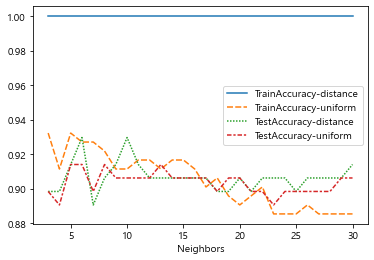

In [53]:
sns.lineplot(data = df_accuracy_weights_pivot)

# uniform 으로 결정

가중치가 distance일때 과적합이 보인다. uniform 으로 결정.

In [55]:
train_accuracy= []
test_accuracy = []
para_neighbors = [i for i in range(3,31)]*3
# 거리계산 방법별 이웃 수 증가에 따른 정확도 변화
para_metric = (["minkowski"])*28 + (["euclidean"])*28 + (["manhattan"])*28

for (v_n_neighbors, v_metric) in zip(para_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,0.932,0.898
1,4,minkowski,0.911,0.891
2,5,minkowski,0.932,0.914
3,6,minkowski,0.927,0.914
4,7,minkowski,0.927,0.898
...,...,...,...,...
79,26,manhattan,0.896,0.898
80,27,manhattan,0.896,0.906
81,28,manhattan,0.896,0.906
82,29,manhattan,0.885,0.906


<AxesSubplot:xlabel='Neighbors'>

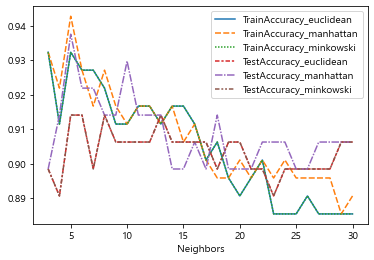

In [56]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_metric_pivot
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

sns.lineplot(data=df_accuracy_metric_pivot)


거리 계산 방법 별 정확의 차이는 비슷한것으로 보인다. euclidean 방법은 과대적합으로 보이며, manhattan 방법을 사용 하여 이웃수를 10으로 했을때로 결정하면 좀 더 높은 정확도를 갖을수 있을 것 같다고 판단된다/

In [61]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
print("Accuracy on training set : {:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 0.911
Accuracy on test set : 0.930
Confusion matrix : 
[[94  3]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.940     0.969     0.954        97
           1      0.893     0.806     0.847        31

    accuracy                          0.930       128
   macro avg      0.916     0.888     0.901       128
weighted avg      0.929     0.930     0.928       128



test 기준 모델의 정확도를 93%이다. 

유방암이 아니라고 예측했는데 유방암이었던 건수가 6건이고 유방암이라고 예측했을 때 실제 유방암이 아니었던 건수가 3건이다. 

유방암이 아닐 것이라고 예측했지만 유방암이라는 건수가 6건이나 있기때문에 확실하게 좋은 모델이라고는 판단하지 못할 것 같다.
